In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Exploratory Data Analysis

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


#### Lets check the null values without using visualization

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

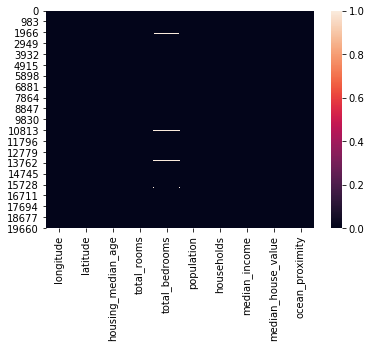

In [8]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

#### Lets fill the null value with median

In [9]:
for column in ['total_bedrooms']:
    data[column].fillna(data[column].median(), inplace=True)

#### Lets again check the null value

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [12]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Lets Convert the ocean_proximity column to Numeric(boolean) Format

In [13]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [14]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==5):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [16]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity         int32
dtype: object

In [17]:
data = pd.DataFrame(data=data)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [18]:
data.shape

(20640, 10)

In [19]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity         int32
dtype: object

#### Find Out the Correlation

In [20]:
dfcor = data.corr()
dfcor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.014631
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014631,-0.070282,-0.018186,-0.014957,0.081750,1.000000


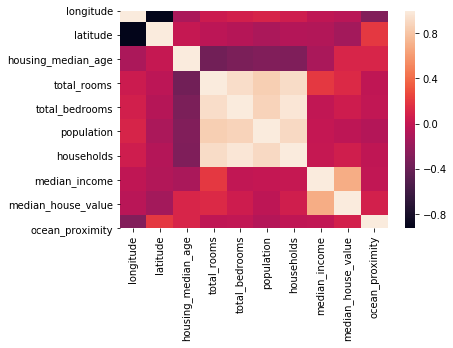

In [21]:
sns.heatmap(dfcor)

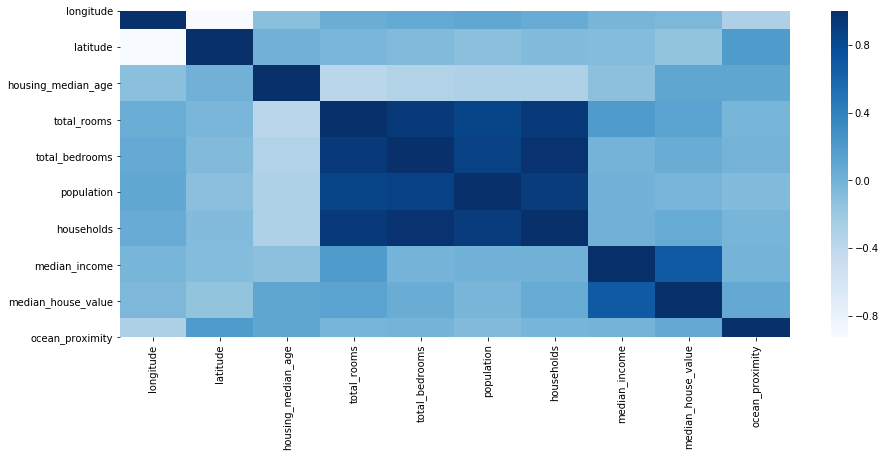

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

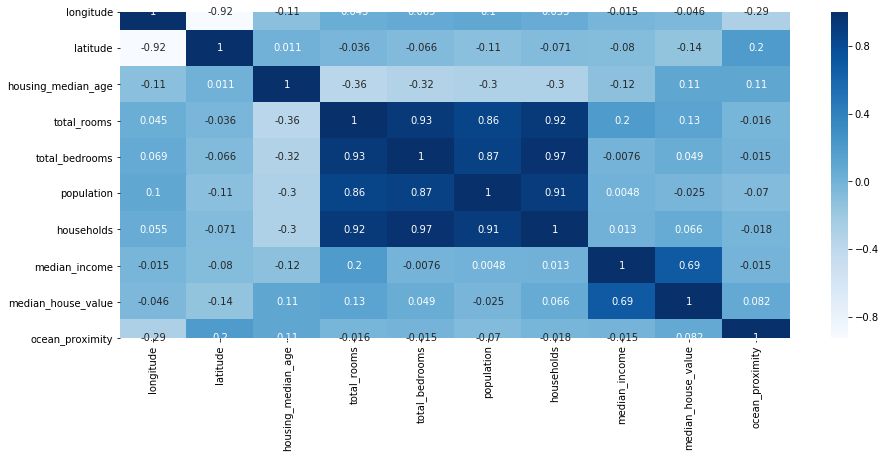

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [24]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(20640, 10)
(19746, 10)


#### Checking Skewness and Removing it

In [25]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.481141
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [26]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [27]:
#Lets Again Check the Skewness
data.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -1.075533
total_bedrooms       -0.998768
population           -1.044087
households           -1.051607
median_income         0.226083
median_house_value   -0.173166
ocean_proximity       0.511956
dtype: float64

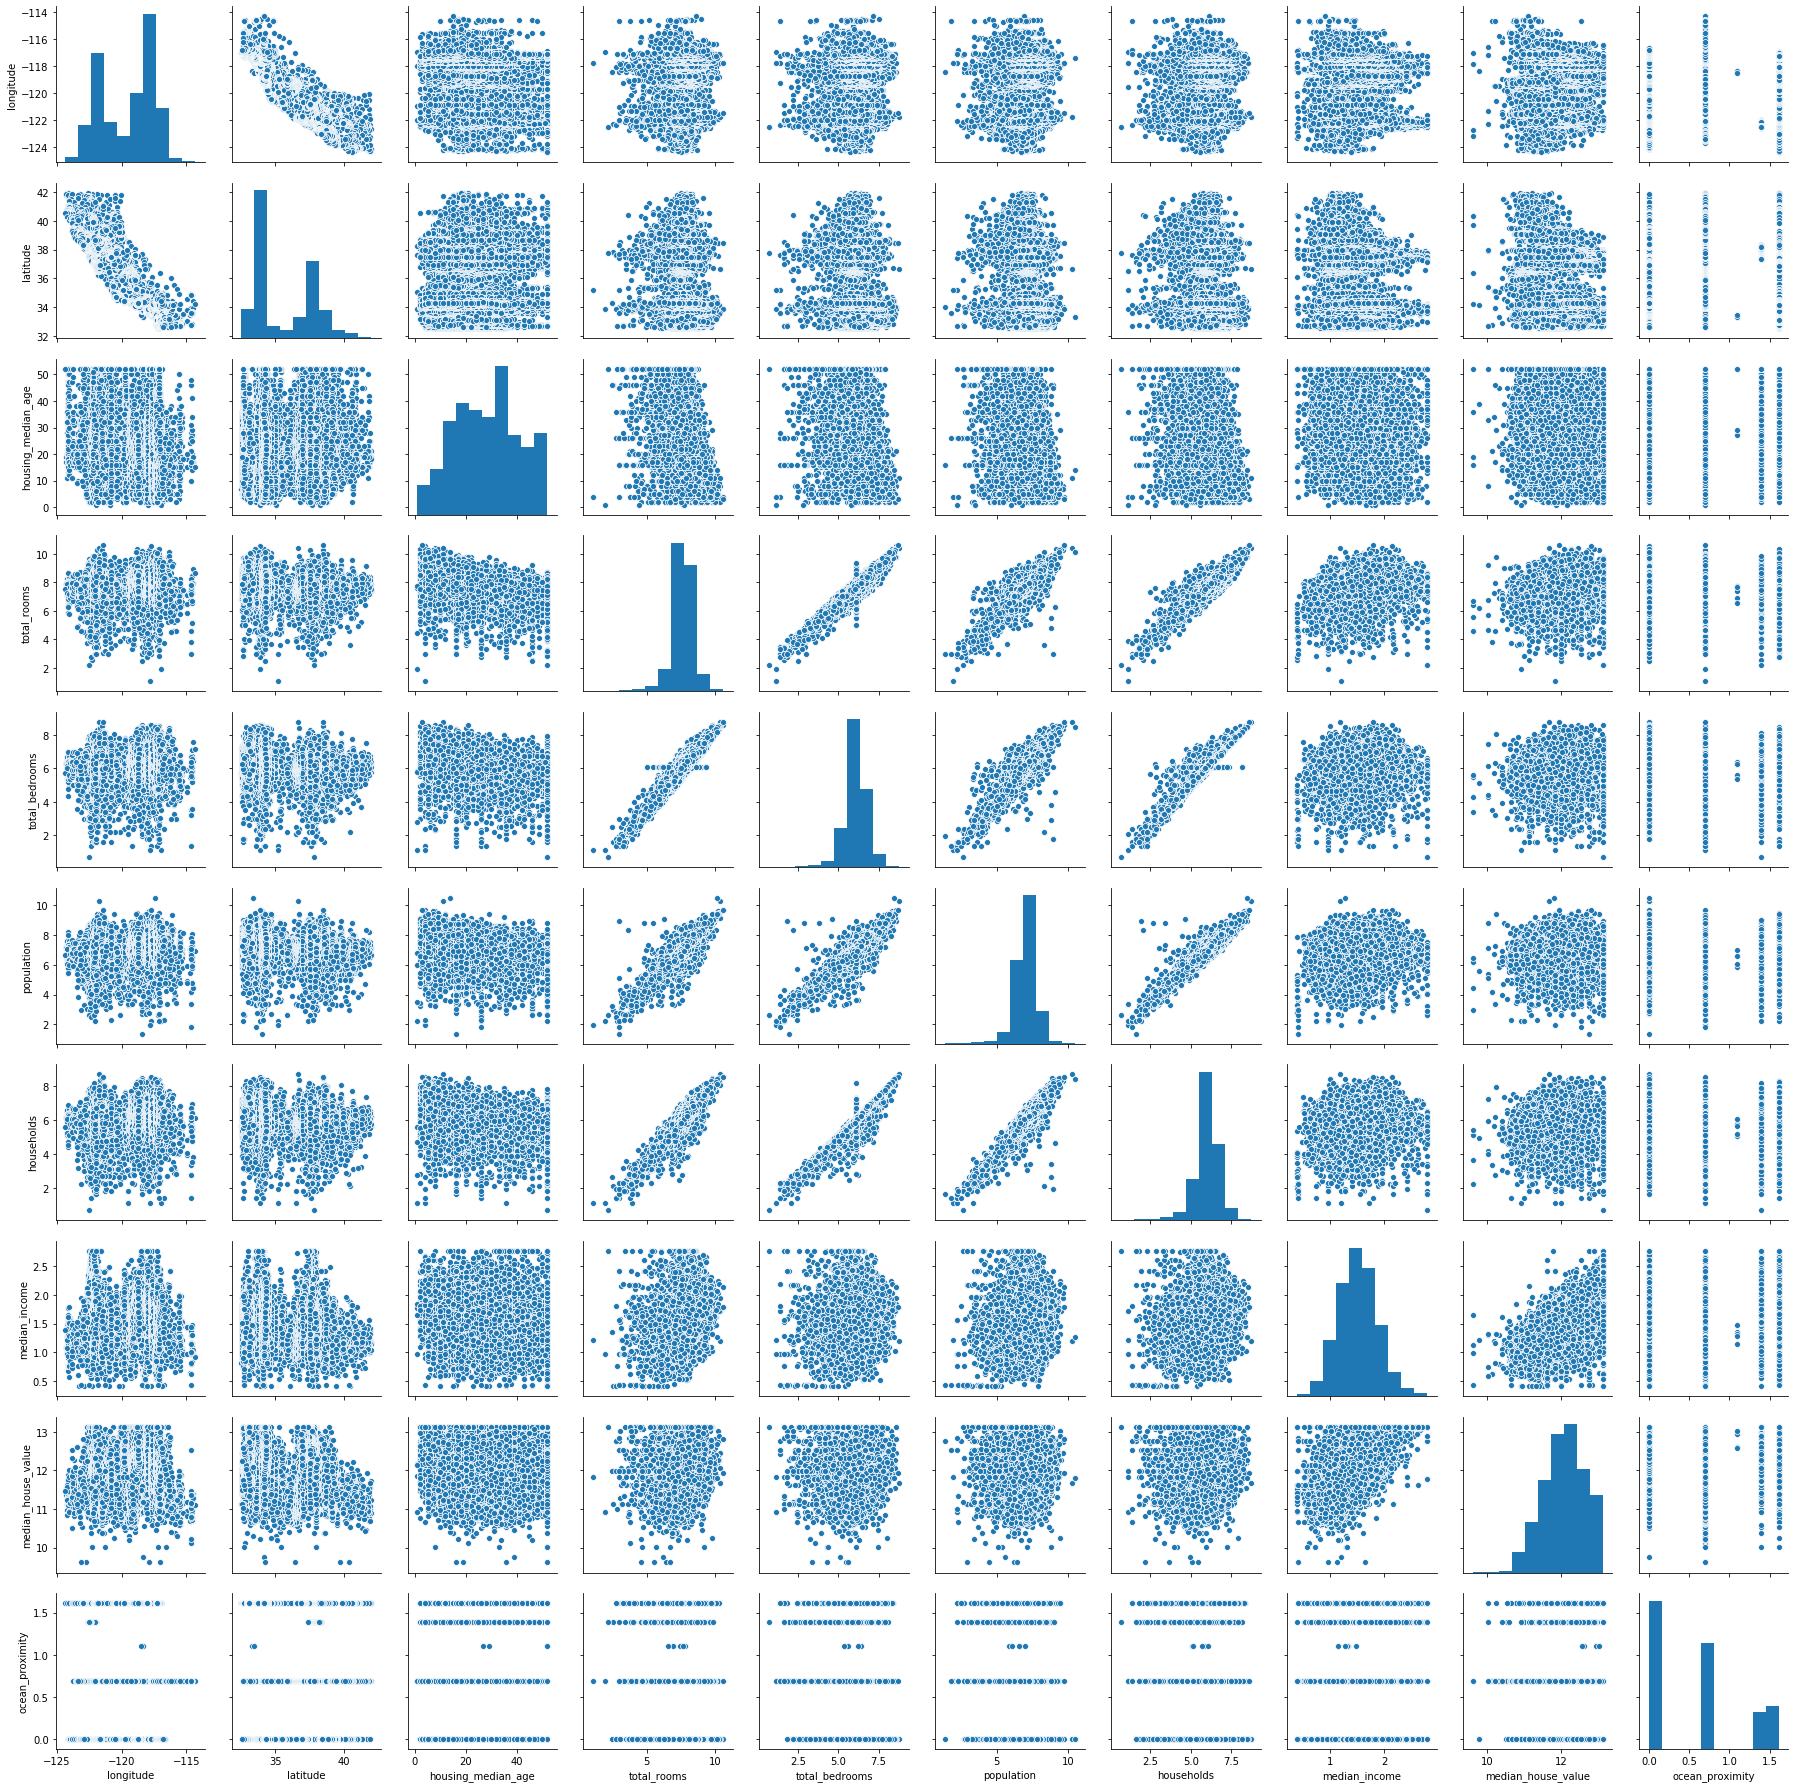

In [28]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

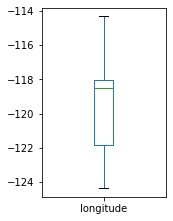

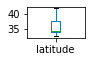

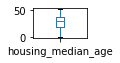

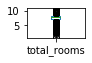

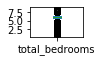

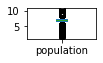

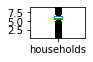

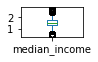

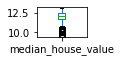

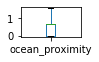

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

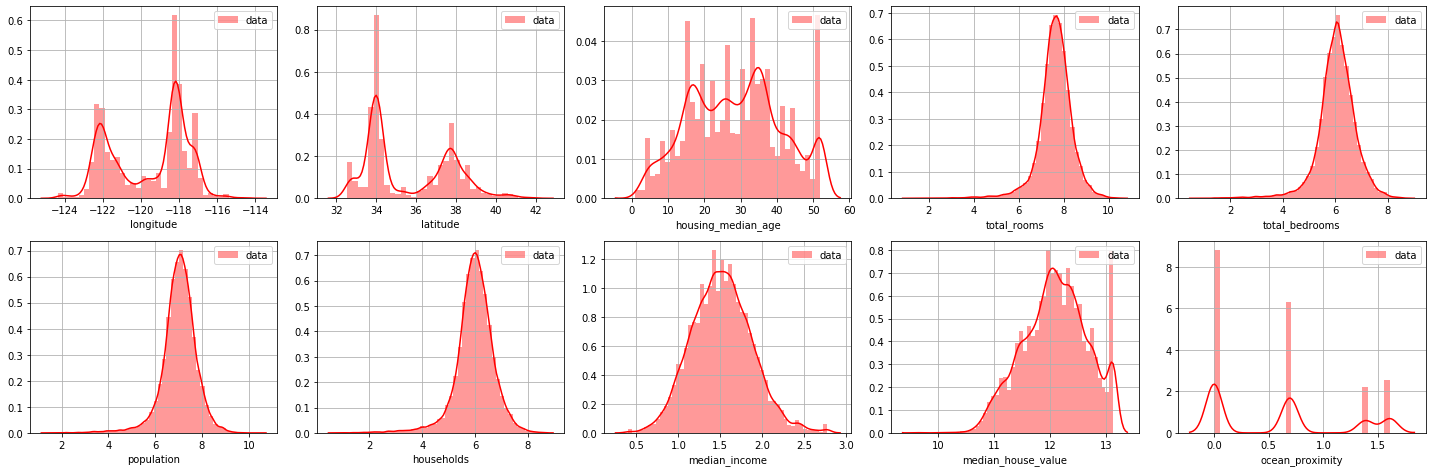

In [30]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### LinePlot

In [31]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

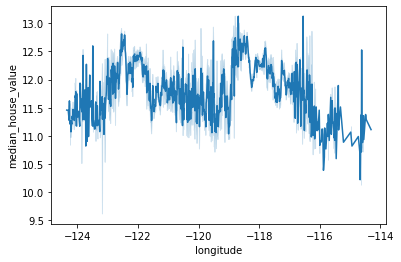

In [32]:
#Lets check the how longitude is changing with respect to median_house_value
sns.lineplot(data["longitude"],data["median_house_value"])
plt.show()

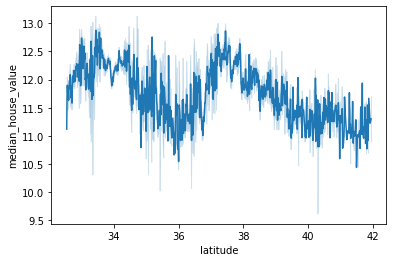

In [33]:
#Lets check the how latitude is changing with respect to median_house_value
sns.lineplot(data["latitude"],data["median_house_value"])
plt.show()

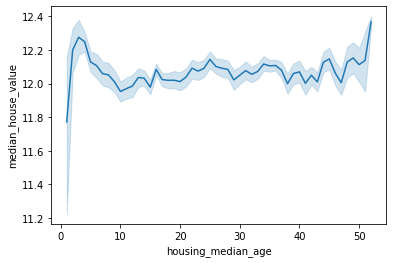

In [34]:
#Lets check the how housing_median_age is changing with respect to median_house_value
sns.lineplot(data["housing_median_age"],data["median_house_value"])
plt.show()

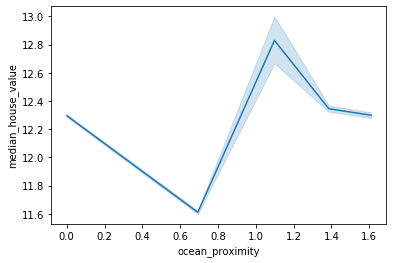

In [35]:
#Lets check the how ocean_proximity is changing with respect to median_house_value
sns.lineplot(data["ocean_proximity"],data["median_house_value"])
plt.show()

#### Plotting Boxplot through Iteration

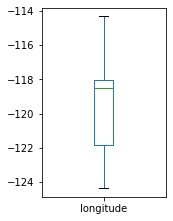

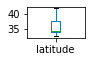

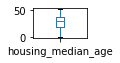

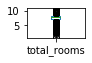

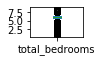

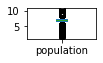

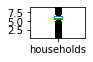

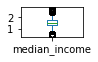

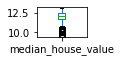

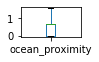

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

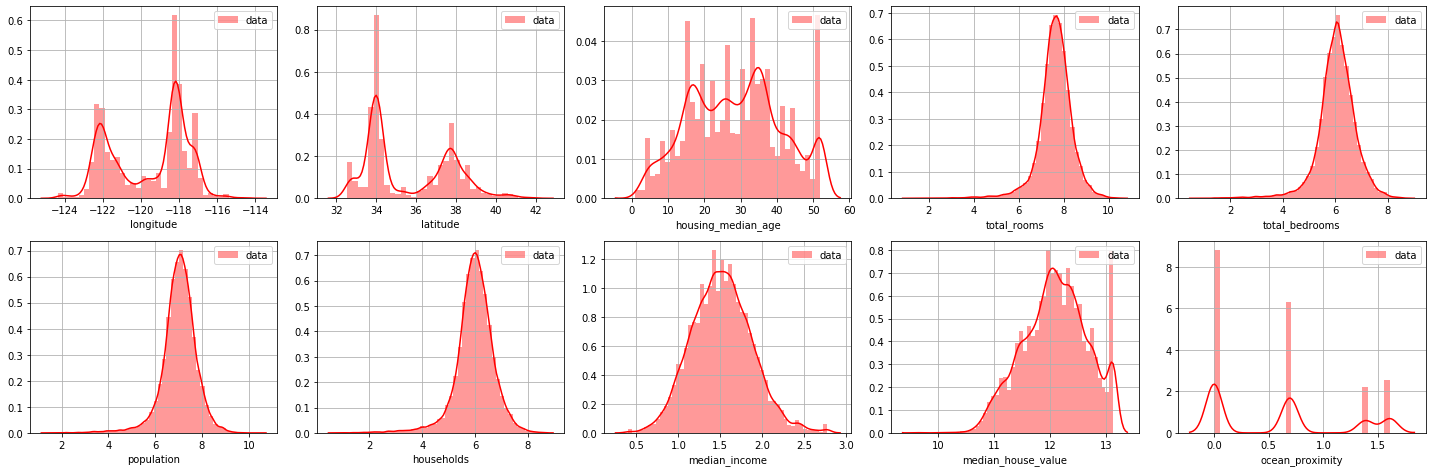

In [37]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Plotting Data using Scatter Plot

In [38]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

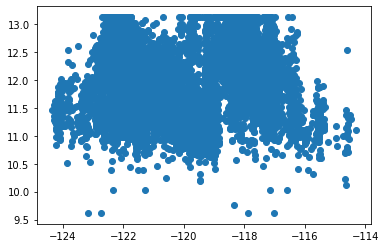

In [39]:
plt.scatter(data['longitude'],data['median_house_value'])

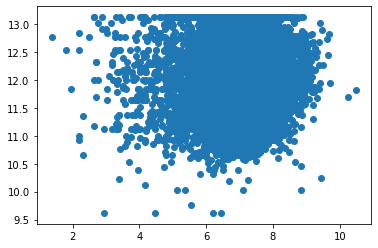

In [40]:
plt.scatter(data['population'],data['median_house_value'])

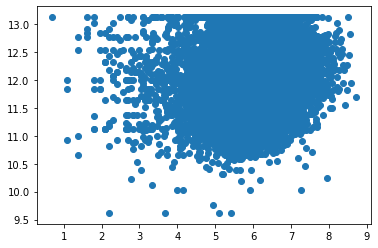

In [41]:
plt.scatter(data['households'],data['median_house_value'])

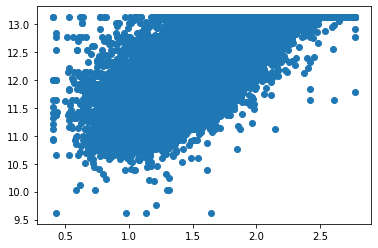

In [42]:
plt.scatter(data['median_income'],data['median_house_value'])

### Column Plot

In [43]:
collist = data.columns.values
ncols=12
nrows=10

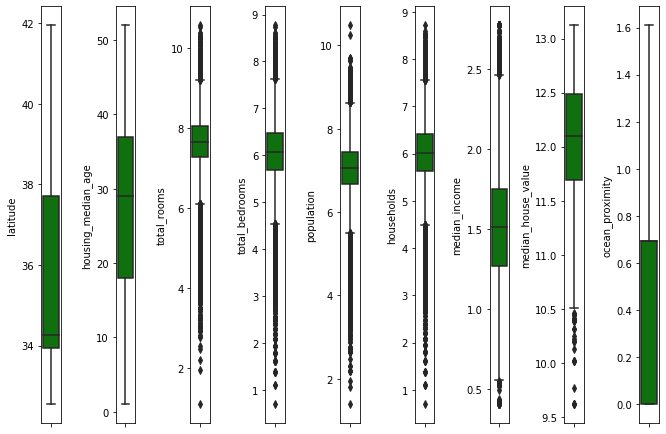

In [44]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [45]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,1.386294
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,1.386294
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,1.386294
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,1.386294
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,1.386294
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,0.940124,11.265758,0.693147
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,1.268861,11.252872,0.693147
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,0.993252,11.432810,0.693147
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.053336,11.346883,0.693147


In [46]:
X = data.drop("median_house_value", axis=1)

In [47]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,2.232720,1.386294
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,2.230165,1.386294
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,2.111110,1.386294
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,1.893579,1.386294
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,1.578195,1.386294
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,0.940124,0.693147
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,1.268861,0.693147
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,0.993252,0.693147
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.053336,0.693147


In [48]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -1.56939502,
         1.99550539,  1.33856546],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.44925114,
         1.98838047,  1.33856546],
       [-1.33282653,  1.03850269,  1.85618152, ..., -1.10484859,
         1.65644419,  1.33856546],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.12156268,
        -1.46024238,  0.18592909],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.17443931,
        -1.29272242,  0.18592909],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.39913412,
        -0.82688611,  0.18592909]])

In [49]:
Y = data["median_house_value"]
Y

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [50]:
Y.shape

(20640,)

In [51]:
Y = Y.values.reshape(-1,1)

In [52]:
Y

array([[13.02276622],
       [12.78968673],
       [12.77167335],
       ...,
       [11.43281025],
       [11.34688269],
       [11.40088715]])

In [53]:
Y.shape

(20640, 1)

In [54]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [55]:
train_X.shape

(16099, 9)

In [56]:
test_X.shape

(4541, 9)

In [57]:
train_Y.shape

(16099, 1)

In [58]:
test_Y.shape

(4541, 1)

#### Applying Linear Regression

In [59]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [60]:
train_X.shape

(13828, 9)

In [61]:
train_Y.shape

(13828, 1)

In [62]:
test_X.shape

(6812, 9)

In [63]:
test_Y.shape

(6812, 1)

In [64]:
lg = LinearRegression()

In [65]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lg.coef_

array([[-0.51612105, -0.55283859,  0.04729505, -0.21978891,  0.34502428,
        -0.3005925 ,  0.18656906,  0.38773294, -0.02897896]])

In [67]:
lg.intercept_

array([12.0844054])

In [68]:
lg.score(train_X,train_Y)

0.6884566861357688

In [69]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[11.92740147]
 [11.65011793]
 [11.72921852]
 ...
 [11.55181367]
 [12.34352093]
 [11.67855215]]
actual price [[11.93885311]
 [11.63426661]
 [12.03647579]
 ...
 [11.6852051 ]
 [12.18791377]
 [11.32419542]]


In [70]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.24161469198735608
Mean sqaured error: 0.10537034662613282
Root mean squared error: 0.32460798915943645


#### Boost through GradientBoostRegressor By using Parameters

In [71]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7972154677355958
Mean squared error: 0.07
R2 Score: 0.78


#### Lets Visualize the Goodness of the Prediction

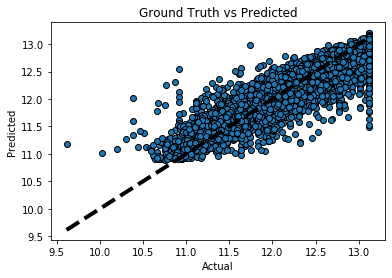

In [73]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [74]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [76]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.6415439690629581
r2 score corresponding to  43 is 0.6896747546069526
r2 score corresponding to  44 is 0.7026468643146615
r2 score corresponding to  45 is 0.6832012371063225
r2 score corresponding to  46 is 0.677394698128701
r2 score corresponding to  47 is 0.6850930971155917
r2 score corresponding to  48 is 0.6904006750426895
r2 score corresponding to  49 is 0.6699085239841244
r2 score corresponding to  50 is 0.6774242328147378
r2 score corresponding to  51 is 0.6931537744675107
r2 score corresponding to  52 is 0.6850161488187536
r2 score corresponding to  53 is 0.6751117514557179
r2 score corresponding to  54 is 0.6783822313983626
r2 score corresponding to  55 is 0.6798927358777991
r2 score corresponding to  56 is 0.6641898591697186
r2 score corresponding to  57 is 0.6843107394046097
r2 score corresponding to  58 is 0.676058942313345
r2 score corresponding to  59 is 0.6993592605987906
r2 score corresponding to  60 is 0.6828931402946445
r2 score corre

### KNN Model

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.08
R2 Score of linear svc: 0.75


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [78]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 12}

In [79]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=12)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.7579154022175728
r2 score corresponding to  43 is 0.7698059151566279
r2 score corresponding to  44 is 0.7732624721572499
r2 score corresponding to  45 is 0.7643596580071559
r2 score corresponding to  46 is 0.7588177215283677
r2 score corresponding to  47 is 0.7616358427381702
r2 score corresponding to  48 is 0.7684596071507399
r2 score corresponding to  49 is 0.7602112343922555
r2 score corresponding to  50 is 0.7464613907014307
r2 score corresponding to  51 is 0.7569117262560583
r2 score corresponding to  52 is 0.7568854837028461
r2 score corresponding to  53 is 0.7532478724757005
r2 score corresponding to  54 is 0.7577477228070302
r2 score corresponding to  55 is 0.7543956419878776
r2 score corresponding to  56 is 0.7544745732104303
r2 score corresponding to  57 is 0.7678640533897069
r2 score corresponding to  58 is 0.7617919722196029
r2 score corresponding to  59 is 0.7624744850828338
r2 score corresponding to  60 is 0.7661475499170265
r2 score cor

In [80]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.6114115704990263
Standard deviation in r2 scorefor Linear Regression: 0.09252741667058922

Mean r2 score for KNN Regression:  0.5861988172686443
Stadard deviation in r2 score for KNN Regression: 0.11015331672064459


### Boosting Linear Regression

In [81]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.46243532972163337
Standard deviation in r2 score for ada boosting Regression:  0.08642499107751422


### Boosting KNN model

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.464860503766613
Standard deviation in r2 score for ada boosting Regression:  0.07799887883235179


#### Lets check lasso regression and best value of alpha

In [83]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [84]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.6087485598828406
Standard deviation in r2 score for Lasso Regression:  0.09736786843365594


### Boosting Lasso Regressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.46680426171929773
Standard deviation in r2 score for ada boosting Regression:  0.081246170274472


### Support Vector Regression

In [86]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.10
R2 Score of linear svc: 0.68


### Boosting Support Vector Machine

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.4785331862698265
Standard deviation in r2 score for ada boosting Regression:  0.07702511566858598


### Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

### Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.07
R2 Score : 0.79


#### Boosting RandomForestRegressor

In [91]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6124067558411791
Standard deviation in r2 score for ada boosting Regression:  0.1175416627759382


#### NOTE::All models,dtregressor gives the Highest r2 score(1) and mean squared error is zero so we are going to save this model

In [92]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'California Housing.pkl')

['California Housing.pkl']